In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

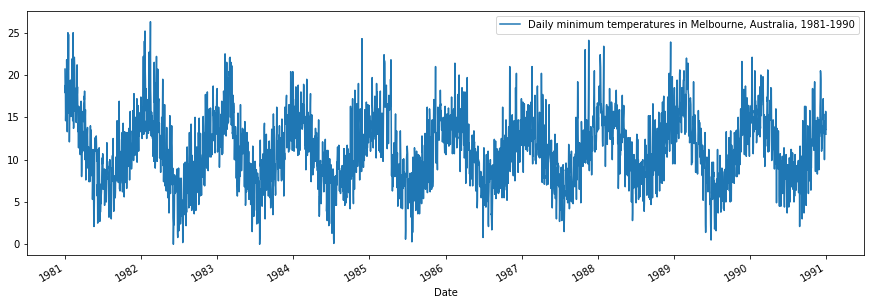

In [3]:
path='https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv'

df=pd.read_csv(path,parse_dates=['Date'],index_col='Date')
df.plot(figsize=(15,5));

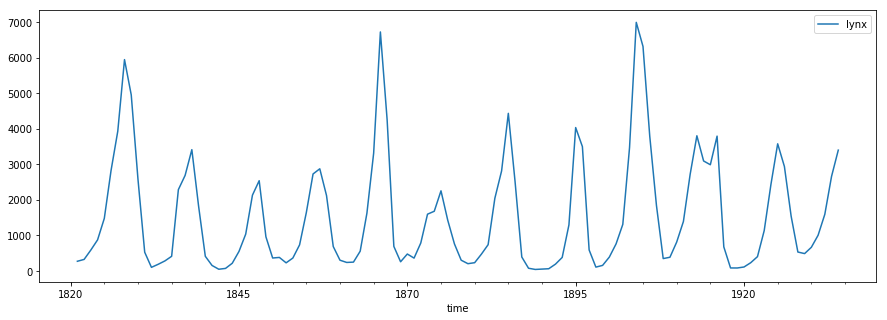

In [5]:
path='https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv'

df=pd.read_csv(path,parse_dates=['time'],index_col='time')
df.plot(figsize=(15,5));

In [6]:
path='https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'

df=pd.read_csv(path)

In [10]:
df['date']=df.apply(lambda row: '{}-{}-{}'.format(int(row['year']),int(row['month']),int(row['day'])),axis=1)
df[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 1 columns):
date    2321 non-null object
dtypes: object(1)
memory usage: 18.2+ KB


In [11]:
df['date']=pd.to_datetime(df['date'])
df.index=df['date']

In [12]:
df.index=pd.to_datetime(df[['year','month','day']])

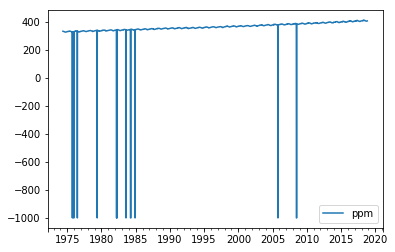

In [13]:
df[['ppm']].plot();

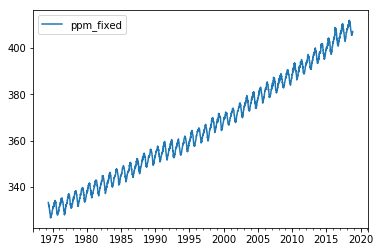

In [18]:
df['ppm_fixed']=df['ppm'].map(lambda x: np.nan if x<0 else x).fillna(method='backfill')
df[['ppm_fixed']].plot();

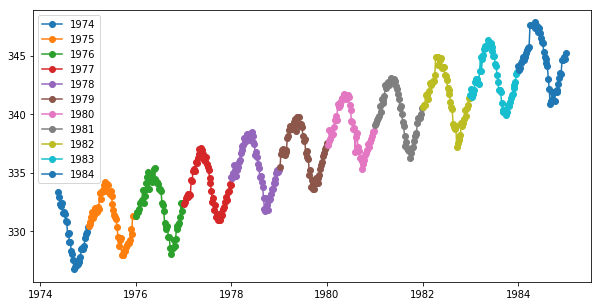

In [22]:
plt.figure(figsize=(10,5))
for year in range(1974,1985):
    df_year=df[df.year== year]
    plt.plot(df_year.index, df_year['ppm_fixed'],'o-', label=year)
plt.legend();